# Convolutional neural networks in Python using keras 

We herein present an example of implementation and fitting of convolutional neural networks (CNNs). 

## Load Keras and load datasets

In [161]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [162]:
#pip install tensorflow==2.1.0
#pip install keras==2.3.1

In [163]:
# Load the Fashion-MNIST dataset
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

## Using Numpy for checking the data

In [164]:
print('Training data dimensions: ', train_X.shape, train_Y.shape)

print('Testing data dimensions: ', test_X.shape, test_Y.shape)

Training data dimensions:  (60000, 28, 28) (60000,)
Testing data dimensions:  (10000, 28, 28) (10000,)


In [165]:
classes = np.unique(train_Y)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)

print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


## Using Matplotlib to plot some graphics

Text(0.5, 1.0, 'Digit: 7')

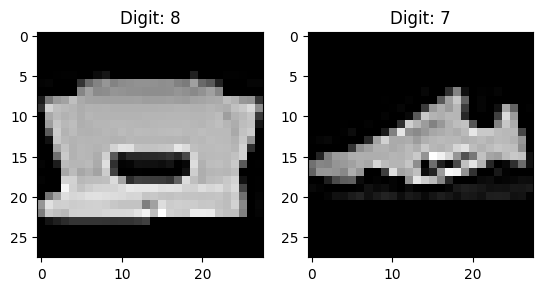

In [166]:
plt.subplot(121)
plt.imshow(train_X[999,:,:], cmap='gray')
plt.title("Digit: {}".format(train_Y[999]))

plt.subplot(122)
plt.imshow(test_X[999,:,:], cmap='gray')
plt.title("Digit: {}".format(test_Y[999]))

### Notes on Fashion-MNIST classes:
- 0: t-shirts, 
- 1: trousers, 
- 2: pullovers, 
- 3: dresses, 
- 4: coats, 
- 5: sandals, 
- 6: shirts, 
- 7: sneakers, 
- 8: bags, 
- 9: ankle boots.

## Using Numpy for data preprocessing...

In [167]:
# -1: the value for this dimension is inferred 
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
print(train_X.shape, test_X.shape)

# convert in float32 (more memory allocated)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

# scale to 0-1, note the . after 255 (float)
train_X = train_X / 255.
test_X = test_X / 255.

(60000, 28, 28, 1) (10000, 28, 28, 1)


## ...and Keras

In [168]:
print('y:', train_Y[0])

train_Y = keras.utils.to_categorical(train_Y)
test_Y = keras.utils.to_categorical(test_Y)

print('y in binary representation:', train_Y[0])
print(train_Y.shape)

y: 9
y in binary representation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(60000, 10)


## Your first CNN

You will have to tune the 2 parameters `batch_size` and `epochs` to improve your model.

In [169]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.vis_utils import plot_model
import pydot #lily 
batch_size = 1000 # try other values
epochs = 5 # try other values
num_classes = 10

In [170]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

In [171]:
#model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer = "sgd",metrics= 'accuracy')

In [172]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = "sgd",metrics= ['accuracy'])

In [173]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 3, 128)        

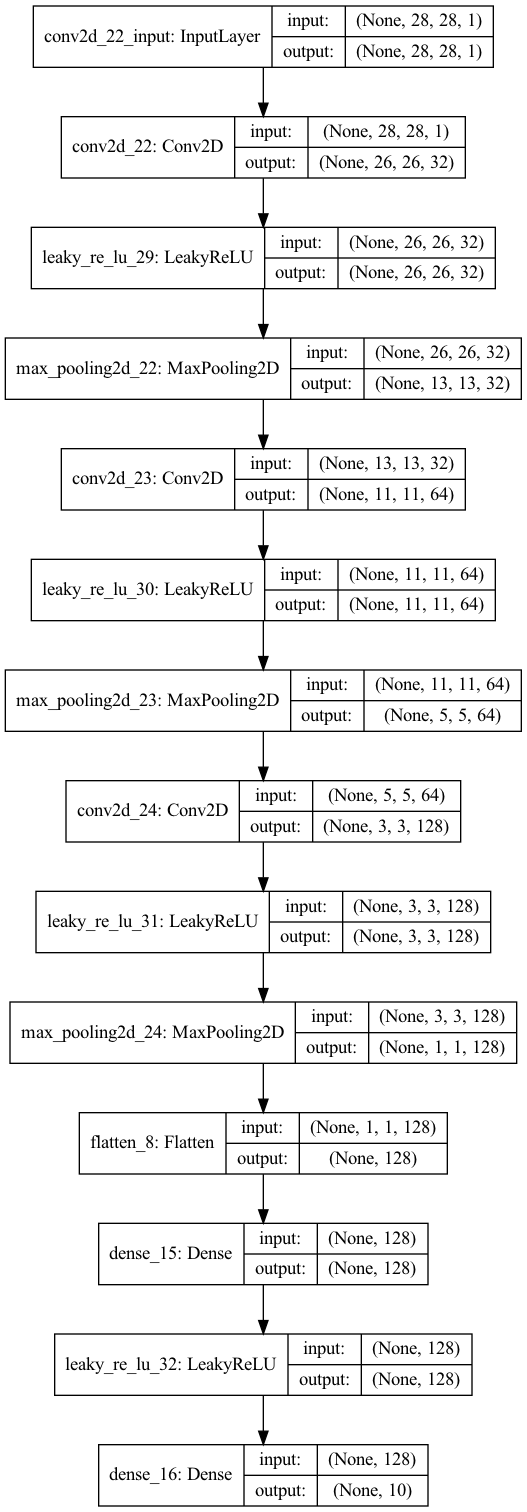

In [174]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [175]:
train = model.fit(train_X, train_Y, 
                  batch_size=batch_size, 
                  epochs=epochs,
                  verbose=1, 
                  validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 89s 2ms/step - loss: 2.2848 - accuracy: 0.1911 - val_loss: 2.2672 - val_accuracy: 0.2508
Epoch 2/5
48000/48000 [==============================] - 92s 2ms/step - loss: 2.2507 - accuracy: 0.2866 - val_loss: 2.2317 - val_accuracy: 0.3137
Epoch 3/5
48000/48000 [==============================] - 119s 2ms/step - loss: 2.2067 - accuracy: 0.3091 - val_loss: 2.1747 - val_accuracy: 0.3165
Epoch 4/5
48000/48000 [==============================] - 127s 3ms/step - loss: 2.1263 - accuracy: 0.3194 - val_loss: 2.0599 - val_accuracy: 0.3338
Epoch 5/5
48000/48000 [==============================] - 128s 3ms/step - loss: 1.9582 - accuracy: 0.3773 - val_loss: 1.8249 - val_accuracy: 0.4869


In [176]:
model.save("my_model" ) # save the model (save structure and fit)


In [177]:
import os
os.getcwd()

'/Users/lilyhuong/Desktop/Prevision_methode'

In [178]:
#del model # delete the model

In [179]:
a = keras.models.load_model("my_model")

AttributeError: 'str' object has no attribute 'decode'

In [180]:
# Recreate the exact same model purely from the file:
model = keras.models.load_model("my_model")

AttributeError: 'str' object has no attribute 'decode'

In [181]:
test_eval = model.evaluate(test_X, test_Y, verbose=0)

In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

In [ ]:
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Your second CNN

You will have to tune the 2 parameters `batch_size` and `epochs` to improve your model.

In [ ]:
batch_size = 1000 #(may be reduced)
epochs = 5 #(may be increased)
num_classes = 10 

## Dropout (controlling for overfitting)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="sgd",metrics='accuracy')

In [ ]:
train_dropout = model.fit(train_X, train_Y, 
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1, 
                          validation_split = 0.2)

As you may see the results are not quite satisfactory in terms of training accuracy... these models are known to easily raise 95% of accuracy, the dropout layer is sensed to avoid overfitting but maybe our model estimation did not converge well. 

Now try to improve both these models and print the results of the second model. First, try to change the values of tuning parameters `batch_size` and `epochs`. Then, once you will get better performance results for both these models, you could propose your own network architecture using fully and locally connected layers.